In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re

In [2]:
df = pd.read_excel('./data/reviews 1.xlsx')

In [7]:
vocab = {}

In [8]:
def initializeVocabulary():
    unkToken = '<UNK>'
    vocab['t_2_i'] = {}
    vocab['i_2_t'] = {}
    vocab['unkToken'] = unkToken
    idx = addToken(unkToken)
    vocab['unkTokenIdx'] = idx

In [9]:
def addToken(token):
    if token in vocab['t_2_i']:
        idx = vocab['t_2_i'][token]
        
    else:
        idx = len(vocab['t_2_i'])
        vocab['t_2_i'][token] = idx
        vocab['i_2_t'][idx] = token
        
    return idx

In [10]:
def addManyTokens(tokens):
    
    idxes = [ addToken(token) for token in tokens]
    return idxes

In [11]:
def lookUpToken(token):
    if vocab['unkTokenIdx']>=0:
        return vocab['t_2_i'].get(token, vocab['unkTokenIdx'])
    
    else:
        return vocab['t_2_i'][token]

In [12]:
def lookUpIndex(idx):
    if idx not in vocab['i_2_t']:
        raise KeyError("The index (%d) is not there" %idx)
    return vocab['i_2_t'][idx]
    

In [13]:
def vocabularyFromDataFrame(df, cutoff = 25):
    initializeVocabulary()
    wordCounts = Counter()
    for r in df.review:
        for word in re.split('\W+', r):
            wordCounts[word] +=1
            
    for word, count in wordCounts.items():
        if count > cutoff:
            addToken(word)

In [14]:
def vocabularyFromCorpus(corpus, cutoff = 25):
    initializeVocabulary()
    wordCounts = Counter()
    for doc in Corpus:
        for word in re.split('\W+', doc):
            wordCounts[word] +=1
            
    for word, count in wordCounts.items():
        if count > cutoff:
            addToken(word)

In [15]:
Corpus = np.array(df['review'])
vocabularyFromCorpus(Corpus)

In [16]:
def oneHotVector(token, n):
    oneHot = np.zeros((n,1))
    oneHot[lookUpToken(token)] = 1
    
    return oneHot

In [17]:
n = len(vocab['t_2_i'])

token = 'the'
oneHot = oneHotVector(token, n)

In [24]:
def computeFeatures(doc, N):
    isFirst = True
    for token in doc:
        oneHot = oneHotVector(token, N)
        if isFirst:
            xF = oneHot
            isFirst = False
        else:
            xF = np.hstack((xF, oneHot))
    return np.mean(xF, axis=1)[:, np.newaxis]

In [45]:
def computeFeaturesVectorize(doc, N):
    fv = np.zeros(N)
    numTokens = 0
    for token in doc:
        fv[lookUpToken(token)] += 1
        numTokens += 1
    return fv/numTokens


In [42]:
def corpusToFeatureMatrix(Corpus, n):
    isFirst = True
    for doc in Corpus:
        fv = computeFeatures(doc, N)
        if isFirst:
            fM = fv
            isFirst = False
        else:
            fM = np.hstack((fM, fv))
    return fM.T

In [43]:
def corpusToFeatureMatrixVectorize(Corpus, n):
    fM = np.zeros((n, len(Corpus)))
    i = 0
    for doc in Corpus:
        fM[:,i] = computeFeatureVectorize(doc, n)
        i+=1
    return fM.T

In [47]:
fv = computeFeatures(Corpus[0], n) # 6s 

In [48]:
fv = computeFeaturesVectorize(Corpus[0], n) # 15ms

In [26]:
fv.shape

(8946, 1)

In [27]:
df = pd.read_excel('./data/reviews 1.xlsx')
X = np.array(df['review'])
y = np.array(df['rating'])

In [28]:
from sklearn.model_selection import train_test_splitin_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [32]:
vocab = {}
vocabularyFromCorpus(X_train)

In [36]:
n = len(vocab['t_2_i'])

In [49]:
X_train_feature_matrix = corpusToFeatureMatrixVectorize(X_train, n) 

In [50]:
X_test_feature_matrix = corpusToFeatureMatrixVectorize(X_test, n) 

In [68]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [58]:
model = LR().fit(X_train_feature_matrix, y_train)

In [60]:
y_pred = model.predict(X_test_feature_matrix)

[]

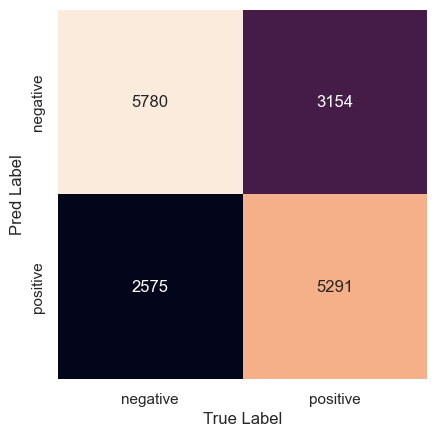

In [67]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square = True, annot=True, fmt = 'd', cbar=False,
           xticklabels= np.unique(y), yticklabels=np.unique(y))
plt.xlabel('True Label')
plt.ylabel('Pred Label')
plt.plot()

In [73]:
y_test_n = np.where(y_test == 'positive', 1, 0)
y_pred_n = np.where(y_pred == 'positive', 1, 0)

In [74]:
f1_score(y_test_n, y_pred_n)

0.6487646373612901

### Testing another model

In [77]:
from lightgbm import LGBMClassifier

In [78]:

# Cria o modelo LGBMClassifier
model = LGBMClassifier()

# Treina o modelo usando X_train_feature_matrix e y_train
model.fit(X_train_feature_matrix, y_train)

# Realiza a previsão usando X_test_feature_matrix
y_pred = model.predict(X_test_feature_matrix)
y_pred_n = np.where(y_pred == 'positive', 1, 0)

# Calcula a pontuação F1
f1 = f1_score(y_test_n, y_pred_n)

print("Pontuação F1:", f1)


Pontuação F1: 0.6712868921018044
